In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = loadmat("project9data1.mat")

In [3]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
print(data1["X"].shape)

(307, 2)


In [5]:
X = data1["X"]

X_val = data1["Xval"]

y_val = data1["yval"]

m = X.shape[0]

In [6]:
X.shape

(307, 2)

In [7]:
X

array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944],
       [13.92240251, 13.40646894],
       [12.82213164, 14.22318782],
       [15.67636615, 15.89169137],
       [16.16287532, 16.20299807],
       [12.66645095, 14.89908374],
       [13.98454962, 12.95800822],
       [14.06146043, 14.54908874],
       [13.38988671, 15.56202142],
       [13.39350475, 15.62698794],
       [13.97900926, 13.28061494],
       [14.16791259, 14.46583829],
       [13.96176145, 14.75182421],
       [14.45899735, 15.07018563],
       [14.58476372, 15.82743424],
       [12.07427074, 13.0671109 ],
       [13.5491294 , 15.53827677],
       [13.98625042, 14.78776304],
       [14.96991942, 16.51830493],
       [14.25576597, 15.29427277],
       [15.33425   , 16.12469989],
       [15.6350487 , 16.49094477],
       [13.62081292, 15.45947525],
       [14.81548485, 15.33956527],
       [14.59318973,

In [8]:
X_val

array([[15.79025979, 14.9210243 ],
       [13.63961877, 15.32995521],
       [14.86589943, 16.47386514],
       [13.58467605, 13.98930611],
       [13.46404167, 15.63533011],
       [12.94888838, 16.14006828],
       [15.31084155, 15.17480137],
       [13.89795241, 15.43169469],
       [11.92096525, 14.30579937],
       [14.85934119, 14.90066474],
       [13.63501268, 14.5620583 ],
       [15.75981741, 15.13340409],
       [15.221965  , 14.18491044],
       [12.10564111, 13.42653822],
       [14.80848889, 13.87075725],
       [15.36135887, 15.99014917],
       [12.72914442, 15.8265107 ],
       [15.38533789, 15.21036416],
       [13.81810534, 14.29933915],
       [15.3788488 , 15.90228514],
       [14.11232153, 15.31616729],
       [12.82415241, 13.6971992 ],
       [14.58354683, 14.99675181],
       [14.2948367 , 15.84651796],
       [13.5112881 , 15.5909427 ],
       [13.71433284, 15.35484382],
       [12.85788467, 14.00239134],
       [14.56998008, 14.22432035],
       [15.59049569,

In [9]:
y_val

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [10]:
m

307

Text(0, 0.5, 'Throughput (mb/s)')

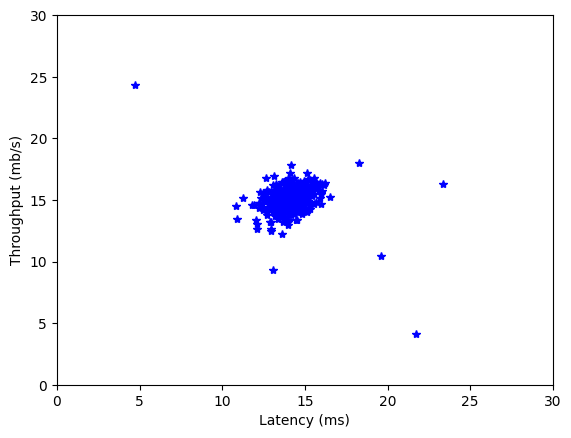

In [11]:
plt.plot(X[:, 0], X[:, 1], "b*")
plt.axis([0, 30, 0, 30])
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [12]:
print(X.shape)

(307, 2)


In [13]:
def gaussianDist(X):
  m, n = X.shape
  mu = np.zeros(n)
  sigma2 = np.zeros(n)

  for i in range(n):
    mu[i] = np.sum(X[:, i]) / m
    sigma2[i] = np.sum(np.square(X[:, i] - mu[i])) / m
    
  return mu, sigma2

In [14]:
mu, sigma2 = gaussianDist(X)

In [15]:
mu

array([14.11222578, 14.99771051])

In [16]:
sigma2

array([1.83263141, 1.70974533])

In [17]:
def p_x(X, mu, sigma2):
  prob = (1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma2))) * np.exp(-((X - mu) ** 2) / (2 * sigma2))
  p_final = np.prod(prob, axis= 1)
  return p_final

In [18]:
p = p_x(X, mu, sigma2)

In [19]:
def selectThreshold(y_val, p_val):
    best_Epsilon = 0
    best_F1 = 0
    F1 = 0
    
    for epsilon in np.linspace(1.01 * min(p_val), max(p_val), 1000):
        predictions = (p_val < epsilon)
        tp = np.sum((predictions == y_val) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        fn = np.sum((predictions == 0) & (y_val == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)

        if F1 > best_F1:
            best_F1 = F1
            best_Epsilon = epsilon

    return best_Epsilon, best_F1

In [20]:
p_val = p_x(X_val, mu, sigma2)

epsilon, F1 = selectThreshold(y_val[:,0], p_val)

In [21]:
print("Best epsilon found using cross-validation: %.2e" % epsilon)
print("Best F1 on Cross Validation Set          : %f\n" % F1)

print("\n# Outliers found: %d" % np.sum(p < epsilon))

Best epsilon found using cross-validation: 9.00e-05
Best F1 on Cross Validation Set          : 0.875000


# Outliers found: 6
